In [18]:
import librosa as lb
import matplotlib.pyplot as plt
import librosa.display
import soundfile as sf
from IPython.display import Audio
import scipy.signal as signal
import numpy as np
from scipy.io import wavfile

In [27]:
audio='AI-in-Speech-processing.wav'
signal,samprate=lb.load(audio)
print("Sample Rate:",samprate)

Sample Rate: 22050


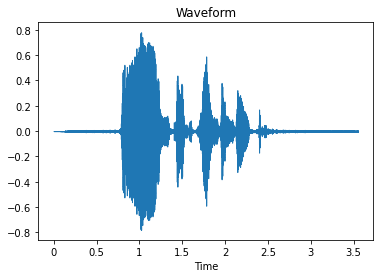

In [107]:
librosa.display.waveshow(signal, sr=samprate)
plt.title('Waveform')
plt.show()

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  6.50202855e-06
 -4.93809814e-04  2.54724873e-04]


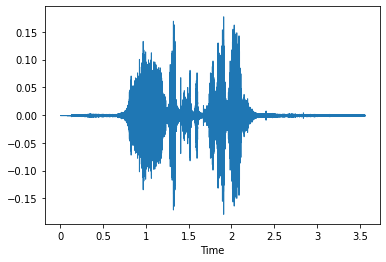

In [110]:
# A1. Find the first derivative of your speech signal with finite difference method. Listen to the first derivative signal and the original speech signal.
First_derivative = np.zeros(len(signal))
First_derivative[0]=signal[0]
for i in range (1,len(signal)):
    First_derivative[i]=signal[i]-signal[i-1]
print(First_derivative)
librosa.display.waveshow(First_derivative)

In [111]:
sf.write('first_derivative.wav', First_derivative, samprate)

Text(0, 0.5, 'Amplitude')

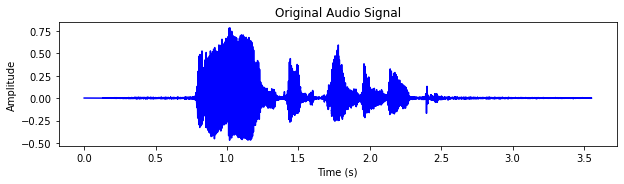

In [39]:
# Plotting the original audio signal
plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
plt.plot(time, signal, 'b')
plt.title('Original Audio Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

In [112]:
time_derivative = np.arange(len(First_derivative))/samprate

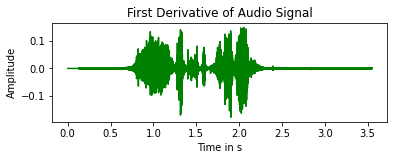

In [113]:
# Plotting the first derivative signal
plt.subplot(2, 1, 2)
plt.plot(time_derivative,First_derivative, 'g')
plt.title('First Derivative of Audio Signal')
plt.xlabel('Time in s')
plt.ylabel('Amplitude')
plt.show()

In [115]:
audio_data, sr = lb.load('first_derivative.wav', sr=samprate)
Audio(data=audio_data, rate=sr)

In [122]:
# A2. Detect the points of zero crossing in the first derivative signal. Compare the average length between two consecutive zero crossings for speech and
#  silence regions. Observe the pattern.

audio6='first_derivative.wav'
first_derivative,samprate=lb.load(audio6)

In [118]:
zero_cros=librosa.zero_crossings(first_derivative, pad=False)
crossing_indices = np.where(zero_cros)[0]
crossing_intervals = np.diff(crossing_indices) / sr 

speech_threshold = 0.1 
speech_intervals = crossing_intervals[crossing_intervals > speech_threshold]
silence_intervals = crossing_intervals[crossing_intervals <= speech_threshold]

avg_speech_length = np.mean(speech_intervals)
avg_silence_length = np.mean(silence_intervals)

print(f'Average Length between Consecutive Zero Crossings (Speech): {avg_speech_length:.4f} seconds')
print(f'Average Length between Consecutive Zero Crossings (Silence): {avg_silence_length:.4f} seconds')

Average Length between Consecutive Zero Crossings (Speech): nan seconds
Average Length between Consecutive Zero Crossings (Silence): 0.0001 seconds


No handles with labels found to put in legend.


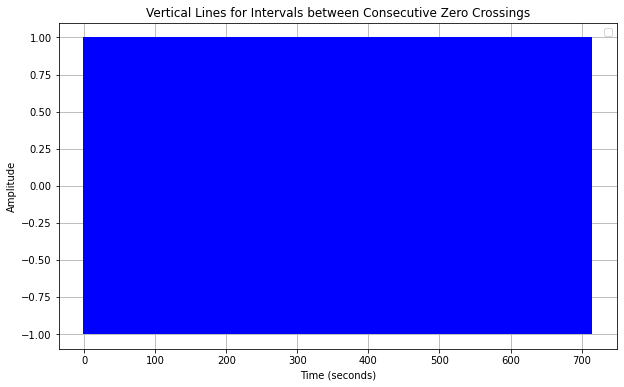

In [123]:
plt.figure(figsize=(10, 6))

plt.vlines(librosa.frames_to_time(np.where(speech_intervals)),1,-1, alpha=0.5)
plt.vlines(librosa.frames_to_time(np.where(silence_intervals)),1,-1,color = "blue", alpha=0.5)

plt.title('Vertical Lines for Intervals between Consecutive Zero Crossings')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

In [82]:
# A3. Speak 5 of your favorite words. Observe the length of the speech signals. Compare the lengths of your spoken words with those of your project team-mate.
audio2='Rayvanth5.wav'
signal2,samprate2=lb.load(audio2)
print("Sample Rate:",samprate2)
audio3='Sreyas1.wav'
signal3,samprate3=lb.load(audio3)
print("Sample Rate:",samprate3)

Sample Rate: 22050
Sample Rate: 22050


Text(0, 0.5, 'Amplitude')

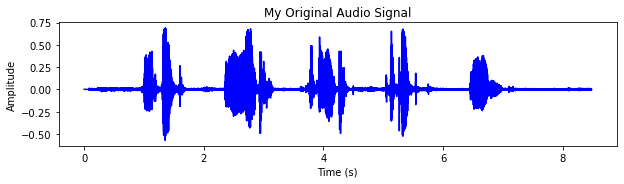

In [83]:
time2=np.arange(len(signal2))/samprate2
plt.figure(figsize=(10, 5))
plt.subplot(2,1,1)
plt.plot(time2,signal2,'b')
plt.title('My Original Audio Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

In [94]:
my_words = lb.effects.split(signal2)
my_word_durations = [len(word)/samprate2 for word in my_words]
print(my_word_durations)

[9.070294784580499e-05]


Text(0, 0.5, 'Amplitude')

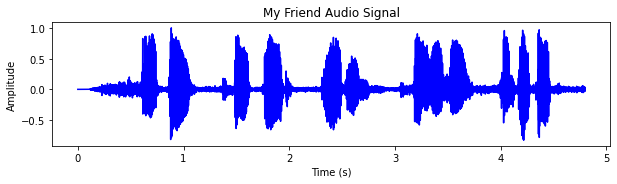

In [86]:
time3=np.arange(len(signal3))/samprate3
plt.figure(figsize=(10, 5))
plt.subplot(2,1,1)
plt.plot(time3,signal3,'b')
plt.title('My Friend Audio Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

In [92]:
friend_words=lb.effects.split(signal3)
friend_word_durations = [len(word)/samprate3 for word in friend_words]
print(friend_word_durations)

[9.070294784580499e-05]


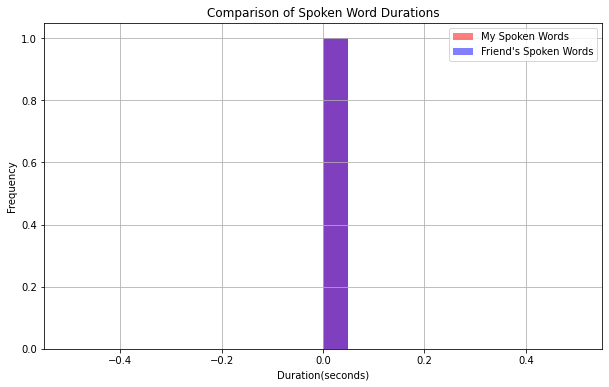

In [95]:
plt.figure(figsize=(10,6))
plt.hist(my_word_durations,bins=20,alpha=0.5,color='red',label='My Spoken Words')
plt.hist(friend_word_durations,bins=20,alpha=0.5,color='blue',label="Friend's Spoken Words")
plt.xlabel('Duration(seconds)')
plt.ylabel('Frequency')
plt.title('Comparison of Spoken Word Durations')
plt.legend()
plt.grid(True)
plt.show()

In [96]:
# A4. Select a sentence which can be used for making a statement or asking a question. Ex: “You are going to college on Sunday(./?)”. Record two signals
# – one with making the statement while other with asking question. Study the two signals and compare them.
audio4='College_Statement.wav'
signal4,samprate4=lb.load(audio4)
print("Sample Rate:",samprate4)
audio5='Clg_question.wav'
signal5,samprate5=lb.load(audio5)
print("Sample Rate:",samprate5)

Sample Rate: 22050
Sample Rate: 22050


In [104]:
statement_time = lb.times_like(statement_pitch, sr=samprate4)
print('Statement_Time:',statement_time)
question_time = lb.times_like(question_pitch, sr=samprate5)
print('Question_Time:',question_time)

Statement_Time: [0.         0.02321995 0.04643991 0.06965986 0.09287982 0.11609977
 0.13931973 0.16253968 0.18575964 0.20897959 0.23219955 0.2554195
 0.27863946 0.30185941 0.32507937 0.34829932 0.37151927 0.39473923
 0.41795918 0.44117914 0.46439909 0.48761905 0.510839   0.53405896
 0.55727891 0.58049887 0.60371882 0.62693878 0.65015873 0.67337868
 0.69659864 0.71981859 0.74303855 0.7662585  0.78947846 0.81269841
 0.83591837 0.85913832 0.88235828 0.90557823 0.92879819 0.95201814
 0.9752381  0.99845805 1.021678   1.04489796 1.06811791 1.09133787
 1.11455782 1.13777778 1.16099773 1.18421769 1.20743764 1.2306576
 1.25387755 1.27709751 1.30031746 1.32353741 1.34675737 1.36997732
 1.39319728 1.41641723 1.43963719 1.46285714 1.4860771  1.50929705
 1.53251701 1.55573696 1.57895692 1.60217687 1.62539683 1.64861678
 1.67183673 1.69505669 1.71827664 1.7414966  1.76471655 1.78793651
 1.81115646 1.83437642 1.85759637 1.88081633 1.90403628 1.92725624
 1.95047619 1.97369615 1.9969161  2.02013605 2.0

In [105]:
statement_pitch = lb.yin(signal4,fmin=50,fmax=400,sr=samprate4)
question_pitch = lb.yin(signal5,fmin=50,fmax=400, sr=samprate5)

Text(0.5, 1.0, 'Question Pitch Contour')

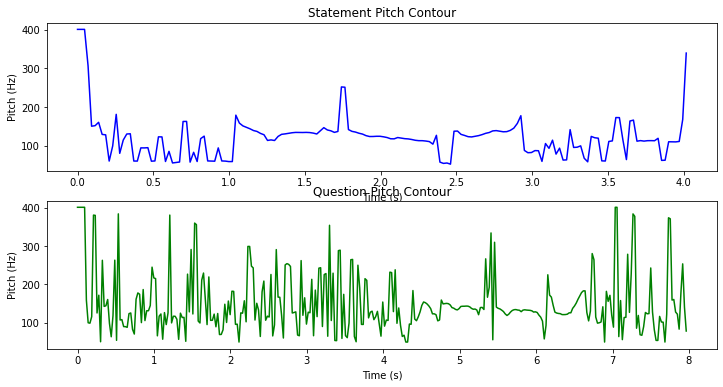

In [106]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(statement_time, statement_pitch, color='blue')
plt.xlabel('Time (s)')
plt.ylabel('Pitch (Hz)')
plt.title('Statement Pitch Contour')

# Plot question pitch contour
plt.subplot(2, 1, 2)
plt.plot(question_time, question_pitch, color='green')
plt.xlabel('Time (s)')
plt.ylabel('Pitch (Hz)')
plt.title('Question Pitch Contour')